# Step 0: Import Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")
%matplotlib inline

# Step 1: Read the Dataset

In [28]:
df = pd.read_csv("clean_lem_stemmed_train_data.csv")

In [109]:
df.head()

,Unnamed: 0,qid,question_text,target
0,0,00002165364db923c7e6,how did quebec nationalists see their province...,0
1,1,000032939017120e6e44,do you have an adopted dog how would you encou...,0
2,2,0000412ca6e4628ce2cf,why does velocity affect time does velocity af...,0
3,3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0
4,4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Unnamed: 0     1306122 non-null  int64 
 1   qid            1306122 non-null  object
 2   question_text  1306121 non-null  object
 3   target         1306122 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 39.9+ MB


# Step 2: Clean Data

# A. Rows:
- Check missing
- Check Null Value
- Check Formats
- Check Duplicates
- Check Data Ranges
- Clean text (remove numbers, punctuations,and convert it to lowercase

In [111]:
# Check total number of missing cells
df.isna().sum()

Unnamed: 0       0
qid              0
question_text    1
target           0
dtype: int64

In [112]:
# Check Missing Percentage in each column
round((df.isna().sum() / 1306122)* 100, 5)

Unnamed: 0       0.00000
qid              0.00000
question_text    0.00008
target           0.00000
dtype: float64

In [29]:
# double check for missing 
df.replace(["#","*",'NA','N/A','?',''],np.nan).isna().sum()

Unnamed: 0       0
qid              0
question_text    1
target           0
dtype: int64

In [114]:
df.question_text.isna().sum()

1

In [115]:
# We found the missing value in row number 420816 
null_data = df[df.isna().any(axis=1)]
null_data 

,Unnamed: 0,qid,question_text,target
420816,420816,527aac2ce6f12f789fe5,NaN,1


In [116]:
# We found the null value in row number 420816 
null_data = df[df.isnull().any(axis=1)]
null_data 

,Unnamed: 0,qid,question_text,target
420816,420816,527aac2ce6f12f789fe5,NaN,1


In [30]:
# We create null_data to remove the missing value from our dataset
null_data = df.drop(labels=420816, axis=0)
null_data

,Unnamed: 0,qid,question_text,target
0,0,00002165364db923c7e6,how did quebec nationalists see their province...,0
1,1,000032939017120e6e44,do you have an adopted dog how would you encou...,0
2,2,0000412ca6e4628ce2cf,why does velocity affect time does velocity af...,0
3,3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0
4,4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0
...,...,...,...,...
1306117,1306117,ffffcc4e2331aaf1e41e,what other technical skills do you need as a c...,0
1306118,1306118,ffffd431801e5a2f4861,does ms in ece have good job prospects in usa ...,0
1306119,1306119,ffffd48fb36b63db010c,is foam insulation toxic,0
1306120,1306120,ffffec519fa37cf60c78,how can one start a research project based on ...,0


In [31]:
null_data.question_text.isna().sum()

0

In [119]:
# check for missing again
null_data.isna().sum()

Unnamed: 0       0
qid              0
question_text    0
target           0
dtype: int64

In [120]:
# check format
null_data.dtypes

Unnamed: 0        int64
qid              object
question_text    object
target            int64
dtype: object

In [121]:
# Check Duplicates
null_data.duplicated().sum()

0

In [122]:
# Check Data Ranges 
# A. Numeric
df.describe

<bound method NDFrame.describe of          Unnamed: 0                   qid  \
0                 0  00002165364db923c7e6   
1                 1  000032939017120e6e44   
2                 2  0000412ca6e4628ce2cf   
3                 3  000042bf85aa498cd78e   
4                 4  0000455dfa3e01eae3af   
...             ...                   ...   
1306117     1306117  ffffcc4e2331aaf1e41e   
1306118     1306118  ffffd431801e5a2f4861   
1306119     1306119  ffffd48fb36b63db010c   
1306120     1306120  ffffec519fa37cf60c78   
1306121     1306121  ffffed09fedb5088744a   

                                             question_text  target  
0        how did quebec nationalists see their province...       0  
1        do you have an adopted dog how would you encou...       0  
2        why does velocity affect time does velocity af...       0  
3        how did otto von guericke used the magdeburg h...       0  
4        can i convert montra helicon d to a mountain b...       0  
...        

In [123]:
# A. Categoricals
round(df.describe(exclude = "number"))

,qid,question_text
count,1306122,1306121
unique,1306122,1304736
top,00002165364db923c7e6,what is
freq,1,129


In [32]:
# add a new column
null_data['qtype'] = np.where(null_data['target'] == 1, 'insincere', 'sincere')
null_data.head()

,Unnamed: 0,qid,question_text,target,qtype
0,0,00002165364db923c7e6,how did quebec nationalists see their province...,0,sincere
1,1,000032939017120e6e44,do you have an adopted dog how would you encou...,0,sincere
2,2,0000412ca6e4628ce2cf,why does velocity affect time does velocity af...,0,sincere
3,3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0,sincere
4,4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0,sincere


In [34]:
# Include only the quetion text and question type
null_data1 = null_data[['question_text', 'qtype']]
null_data1.head()

,question_text,qtype
0,how did quebec nationalists see their province...,sincere
1,do you have an adopted dog how would you encou...,sincere
2,why does velocity affect time does velocity af...,sincere
3,how did otto von guericke used the magdeburg h...,sincere
4,can i convert montra helicon d to a mountain b...,sincere


In [22]:
# the dataset has mostly sincere questions
null_data.qtype.value_counts(normalize=True)

sincere      0.938131
insincere    0.061869
Name: qtype, dtype: float64

In [35]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

# Keep only Letters & remove numbers 
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# Remove special characters/punct & make all lower
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove special characters/punct & make all lower
null_data1['question_text'] = null_data1.question_text.map(alphanumeric).map(punc_lower)
null_data1.head()

C:\Users\hmalm\AppData\Local\Temp/ipykernel_10036/529856106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_data1['question_text'] = null_data1.question_text.map(alphanumeric).map(punc_lower)


,question_text,qtype
0,how did quebec nationalists see their province...,sincere
1,do you have an adopted dog how would you encou...,sincere
2,why does velocity affect time does velocity af...,sincere
3,how did otto von guericke used the magdeburg h...,sincere
4,can i convert montra helicon d to a mountain b...,sincere


In [127]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hmalm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hmalm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
english = stopwords.words('english')

In [42]:
# remove stop words from question_text column
temp = null_data1.copy()
temp.question_text =temp['question_text'].apply(word_tokenize) 
temp.question_text = temp.question_text.apply(lambda words: [word for word in words if word not in english])

In [43]:
temp

,question_text,qtype
0,"[quebec, nationalists, see, province, nation]",sincere
1,"[adopted, dog, would, encourage, people, adopt...",sincere
2,"[velocity, affect, time, velocity, affect, spa...",sincere
3,"[otto, von, guericke, used, magdeburg, hemisph...",sincere
4,"[convert, montra, helicon, mountain, bike, cha...",sincere
...,...,...
1306117,"[technical, skills, need, computer, science, u...",sincere
1306118,"[ms, ece, good, job, prospects, usa, like, ind...",sincere
1306119,"[foam, insulation, toxic]",sincere
1306120,"[one, start, research, project, based, biochem...",sincere


# B. Columns
- Remove white spaces 

In [44]:
# remove spaces
temp.columns = temp.columns.str.strip()

In [45]:
temp.head(1)

,question_text,qtype
0,"[quebec, nationalists, see, province, nation]",sincere


# Step 3: Explore Data (EDA)

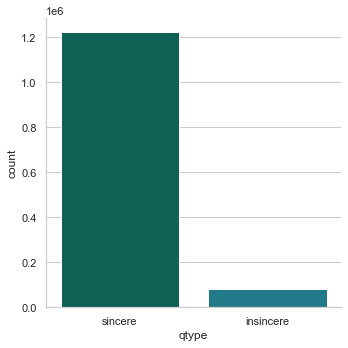

In [46]:
# Check Target --> target (balanced or not??)
sns.set_theme(style='whitegrid', palette = "PuBuGn_r")
sns.catplot(x='qtype', data= temp, kind='count');

### Based on the graph above it shows that sincere questions is much more than insincere questions, so it is unbalanced.